# Question 1
Visualize the predictions
of 1NN on a 2D grid

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
df= pd.read_table('D2z.txt', sep=" ", header=None)
arr=df.to_numpy()

In [ ]:
def eucd(x1,x2):
  dist=0
  for i in range(len(x1)-1):
    dist+=(x1[i]-x2[i])**2
  return np.sqrt(dist)

def neighborCalc(test,train,k):
  dist=list()
  for trainR in train:
    d=eucd(trainR,test)
    dist.append((trainR,d))
  dist.sort(key=lambda tup: tup[1])
  neighbors=list()
  for i in range(k):
    neighbors.append(dist[i][0])
  return neighbors
def predict(train,test,k):
  pred=list()
  for t in test:
    n=neighborCalc(t,train,k)
    op=[row[-1] for row in n]
    pred.append((t[0],t[1],max(set(op), key=op.count)))

  return pred


In [ ]:
test=list()
f1=np.linspace(-2,2,40)
f2=np.linspace(-2,2,40)
for x1 in f1:
  for x2 in f2:
    test.append((x1,x2))
ans=predict(arr,test,1)

In [ ]:
ans=pd.DataFrame(ans,columns = ['X1','X2','Y'])
arr=pd.DataFrame(arr,columns = ['X1','X2','Y'])

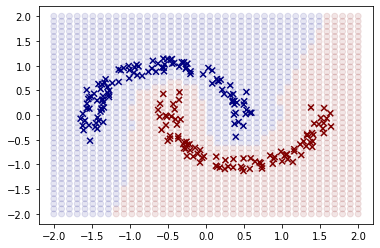

In [ ]:
plt.scatter(ans['X1'], ans['X2'], c=ans['Y'],alpha=0.1,cmap="jet_r")
plt.scatter(arr['X1'], arr['X2'], c=arr['Y'], marker='x',cmap="jet_r")

## Question 2
5 Fold KNN

In [ ]:
df= pd.read_table('emails.csv', sep=",")
df=df.drop(['Email No.'],axis=1)

In [ ]:
def eucdist(a,b): 
  a=np.array(a)
  b=np.array(b)
  return np.linalg.norm(a-b)
def knn(train,test,k):
  testX, testY = test.drop([test.columns[-1]], axis=1), test[test.columns[-1]]
  X, y = train.drop([train.columns[-1]], axis=1), train[train.columns[-1]]
  X=X.iloc[:,1:].to_numpy()
  y=y.to_numpy()
  testX=testX.iloc[:,1:].to_numpy()
  testY=testY.to_numpy()
  ypred=[]
  train=train.to_numpy
  for testIndex,test in enumerate(testX):
      distances = [eucdist(test, x) for x in (X)]
      idx = np.argpartition(distances, k-1)[:k]
      counter = Counter(y[idx])
      ypred.append(counter.most_common()[0][0])
      if(testIndex%500==0):
       print(testIndex)

  count =0 
  tp=0
  fp=0
  fn=0
  perfect=0  
  Prob={'Match':0,'True Positive':0,'False Positive':0,'False Negative':0,'True Negative':0}
  for count in range(np.size(ypred)):
    if(ypred[count]==testY[count]):
      Prob['Match']+=1
      if(testY[count]==1):
        Prob['True Positive']+=1
    if((ypred[count]==1) and (testY[count]==0)):
      Prob['False Positive']+=1
    if((ypred[count]==0) and (testY[count]==1)):
      Prob['False Negative']+=1
    if ((ypred[count] == 0) and (testY[count] == 0)):
      Prob['True Negative'] += 1
    count=count+1               
  
  return Prob




In [ ]:
i=0
print("Fold :",i,":",i+1000)
test = df.iloc[i:i + 1000, :]
train = df.drop(test.index)
Prob=knn(train,test,1)
print("Accuracy = ",Prob["Match"]/1000)
print("Precision = ",Prob["True Positive"]/(Prob["True Positive"]+Prob["False Positive"]))
print("Recall = ",Prob["True Positive"]/(Prob["True Positive"]+Prob["False Negative"]))

Fold : 0 : 1000
0
500
Accuracy =  0.821
Precision =  0.6480446927374302
Recall =  0.8140350877192982


In [ ]:
i=1000
print("Fold :",i,":",i+1000)
test = df.iloc[i:i + 1000, :]
train = df.drop(test.index)
Prob=knn(train,test,1)
print("Accuracy = ",Prob["Match"]/1000)
print("Precision = ",Prob["True Positive"]/(Prob["True Positive"]+Prob["False Positive"]))
print("Recall = ",Prob["True Positive"]/(Prob["True Positive"]+Prob["False Negative"]))



Fold : 1000 : 2000
0
500
Accuracy =  0.853
Precision =  0.6857142857142857
Recall =  0.8664259927797834


In [ ]:
i=2000
print("Fold :",i,":",i+1000)
test = df.iloc[i:i + 1000, :]
train = df.drop(test.index)
Prob=knn(train,test,1)
print("Accuracy = ",Prob["Match"]/1000)
print("Precision = ",Prob["True Positive"]/(Prob["True Positive"]+Prob["False Positive"]))
print("Recall = ",Prob["True Positive"]/(Prob["True Positive"]+Prob["False Negative"]))

Fold : 2000 : 3000
0
500
Accuracy =  0.861
Precision =  0.7217125382262997
Recall =  0.8309859154929577


In [ ]:
i=3000
print("Fold :",i,":",i+1000)
test = df.iloc[i:i + 1000, :]
train = df.drop(test.index)
Prob=knn(train,test,1)
print("Accuracy = ",Prob["Match"]/1000)
print("Precision = ",Prob["True Positive"]/(Prob["True Positive"]+Prob["False Positive"]))
print("Recall = ",Prob["True Positive"]/(Prob["True Positive"]+Prob["False Negative"]))

Fold : 3000 : 4000
0
500
Accuracy =  0.853
Precision =  0.7220543806646526
Recall =  0.8129251700680272


In [ ]:
i=4000
print("Fold :",i,":",i+1000)
test = df.iloc[i:i + 1000, :]
train = df.drop(test.index)
Prob=knn(train,test,1)
print("Accuracy = ",Prob["Match"]/1000)
print("Precision = ",Prob["True Positive"]/(Prob["True Positive"]+Prob["False Positive"]))
print("Recall = ",Prob["True Positive"]/(Prob["True Positive"]+Prob["False Negative"]))

Fold : 4000 : 5000
0
500
Accuracy =  0.778
Precision =  0.6105263157894737
Recall =  0.7581699346405228


#Question 3

In [ ]:
def weights_update(X,th,b,Y,n,alpha):
  A = 1 / (1 + np.exp(- (X.dot(th) + b)))

  temp = (A - Y.T)
  temp = np.reshape(temp, n)
  dth = np.dot(X.T, temp) / n
  db = np.sum(temp) / n

  th = th - alpha * dth
  b = b - alpha * db

  return th,b

def fit(X,Y,iterations,alpha):
  n,m = X.shape
  th = np.zeros(m)
  b = 0
  X = X
  Y = Y
  for i in range(iterations):
      th,b=weights_update(X,th,b,Y,n,alpha)
  return th,b

def predict(X,th,b,thresh=0.5):
  P = 1 / (1 + np.exp(- (X.dot(th) + b)))
  Y = np.where(P > thresh, 1, 0)
  return Y

In [ ]:
df= pd.read_table('emails.csv', sep=",")
i=0
while (i<5000):
  test = df.iloc[i:i + 1000, :]
  train = df.drop(test.index)
  X_train = train.iloc[:, 1:-1].values
  X_test = test.iloc[:, 1:-1].values
  Y_train = train.iloc[:, -1:].values
  testY = test.iloc[:, -1:].values.ravel()
  th,b=fit(X_train,Y_train,1000,0.1)

  ypred = predict(X_test,th,b,0.5)
  count = 0
  tp = 0
  fp = 0
  fn = 0
  correct = 0
  print(testY.shape)
  print(ypred.shape)
  for count in range(np.size(ypred)):
      if (ypred[count] == testY[count]):
          correct += 1
          if (testY[count] == 1):
              tp += 1
      if ((ypred[count] == 1) and (testY[count] == 0)):
          fp += 1
      if ((ypred[count] == 0) and (testY[count] == 1)):
          fn += 1
      count = count + 1
  accuracy = (float(correct) / float(count)) * 100
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)
  print("Accuracy = ",accuracy)
  print("Precision = ",precision)
  print("Recall = ",recall)
  i+=1000

<ipython-input-66-b6335d799401>:2: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(- (X.dot(th) + b)))
<ipython-input-66-b6335d799401>:25: RuntimeWarning: overflow encountered in exp
  P = 1 / (1 + np.exp(- (X.dot(th) + b)))


(1000,)
(1000,)
Accuracy =  90.9
Precision =  0.8391608391608392
Recall =  0.8421052631578947
(1000,)
(1000,)
Accuracy =  88.3
Precision =  0.8809523809523809
Recall =  0.6678700361010831
(1000,)
(1000,)
Accuracy =  85.8
Precision =  0.9034090909090909
Recall =  0.5598591549295775
(1000,)
(1000,)
Accuracy =  88.4
Precision =  0.7696969696969697
Recall =  0.8639455782312925
(1000,)
(1000,)
Accuracy =  52.900000000000006
Precision =  0.3910171730515192
Recall =  0.9673202614379085


# Question 4
k= 1,3,5,7,10 with 5 Folds

In [ ]:
i,k=0,3
accuracy=0
while(i<5001):
  print("Fold :",i,":",i+1000)
  test = df.iloc[i:i + 1000, :]
  train = df.drop(test.index)
  Prob=knn(train,test,k)
  accuracy+=Prob["Match"]/1000
  i+=1000

Fold : 0 : 1000
0
500
Fold : 1000 : 2000
0
500
Fold : 2000 : 3000
0
500
Fold : 3000 : 4000
0
500
Fold : 4000 : 5000
0
500
Fold : 5000 : 6000


In [ ]:
accuracy/5

0.8408

In [ ]:
i,k=0,5
accuracy5=0
while(i<5001):
  print("Fold :",i,":",i+1000)
  test = df.iloc[i:i + 1000, :]
  train = df.drop(test.index)
  Prob=knn(train,test,k)
  accuracy5+=Prob["Match"]/1000
  i+=1000

Fold : 0 : 1000
0
500
Fold : 1000 : 2000
0
500
Fold : 2000 : 3000
0
500
Fold : 3000 : 4000
0
500
Fold : 4000 : 5000
0
500
Fold : 5000 : 6000


In [ ]:
i,k=0,7
accuracy7=0
while(i<5001):
  print("Fold :",i,":",i+1000)
  test = df.iloc[i:i + 1000, :]
  train = df.drop(test.index)
  Prob=knn(train,test,k)
  accuracy7+=Prob["Match"]/1000
  i+=1000

Fold : 0 : 1000
0
500
Fold : 1000 : 2000
0
500
Fold : 2000 : 3000
0
500
Fold : 3000 : 4000
0
500
Fold : 4000 : 5000
0
500
Fold : 5000 : 6000


In [ ]:
i,k=0,10
accuracy10=0
while(i<5001):
  print("Fold :",i,":",i+1000)
  test = df.iloc[i:i + 1000, :]
  train = df.drop(test.index)
  Prob=knn(train,test,k)
  accuracy10+=Prob["Match"]/1000
  i+=1000

Fold : 0 : 1000
0
500
Fold : 1000 : 2000
0
500
Fold : 2000 : 3000
0
500
Fold : 3000 : 4000
0
500
Fold : 4000 : 5000
0
500
Fold : 5000 : 6000


In [ ]:
accuracy1=0.821+0.853+0.861+0.853+0.778
accuracy1/5
accuracy/5

0.8332

In [ ]:
ypoint=[accuracy1/5,accuracy/5,accuracy5/5,accuracy7/5,accuracy10/5]
xpoint=[1,3,5,7,10]


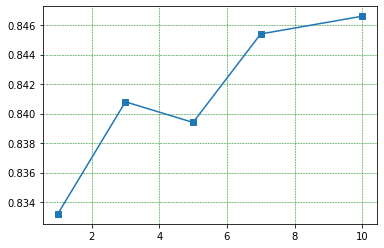

In [ ]:
plt.plot(xpoint,ypoint,marker='s')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

#Question 5

Use a single training/test setting. Train kNN (k=5) and logistic regression on the training set, and
draw ROC curves based on the test set.

In [ ]:
def knnThresh(train,test,k,thresh):
  testX, testY = test.drop([test.columns[-1]], axis=1), test[test.columns[-1]]
  X, y = train.drop([train.columns[-1]], axis=1), train[train.columns[-1]]
  X=X.iloc[:,1:].to_numpy()
  y=y.to_numpy()
  testX=testX.iloc[:,1:].to_numpy()
  testY=testY.to_numpy()
  ypred=[]
  train=train.to_numpy
  for testIndex,test in enumerate(testX):
      distances = [eucdist(test, x) for x in (X)]
      idx = np.argpartition(distances, k-1)[:k]
      counter = Counter(y[idx])
      fraction = 0
      if counter.get(1) != None:
          fraction = (float)(counter.get(1)) / k
      if (fraction >= thresh):
          ypred.append(1)
      else:
          ypred.append(0)
      if(testIndex%500==0):
       print(testIndex)

  count =0 
  tp=0
  fp=0
  fn=0
  perfect=0  
  Prob={'Match':0,'True Positive':0,'False Positive':0,'False Negative':0,'True Negative':0}
  for count in range(np.size(ypred)):
    if(ypred[count]==testY[count]):
      Prob['Match']+=1
      if(testY[count]==1):
        Prob['True Positive']+=1
    if((ypred[count]==1) and (testY[count]==0)):
      Prob['False Positive']+=1
    if((ypred[count]==0) and (testY[count]==1)):
      Prob['False Negative']+=1
    if ((ypred[count] == 0) and (testY[count] == 0)):
      Prob['True Negative'] += 1
    count=count+1               
  
  return Prob


In [ ]:
ktpr = []
kfpr = []
test = df.iloc[2000:3000, :]
train = df.drop(test.index)
for threshold in np.arange(0, 1.1, 0.1):
  Prob=knnThresh(train,test,5,threshold)
  ktpr.append(Prob["True Positive"]/(Prob["True Positive"]+Prob["False Negative"]))
  kfpr.append(Prob["False Positive"]/(Prob["True Negative"]+Prob["False Positive"]))

X_train = train.iloc[:, 1:-1].values
X_test = test.iloc[:, 1:-1].values
Y_train = train.iloc[:, -1:].values
testY = test.iloc[:, -1:].values.ravel()
th,b=fit(X_train,Y_train,1000,0.1)
ltpr=[]
lfpr=[]
for threshold in np.arange(0, 1.1, 0.1):
  ypred = predict(X_test,th,b,threshold)
  count = 0
  tp = 0
  fp = 0
  fn = 0
  tn=0
  correct = 0
  print(testY.shape)
  print(ypred.shape)
  for count in range(np.size(ypred)):
      if (ypred[count] == testY[count]):
          correct += 1
          if (testY[count] == 1):
              tp += 1
      if ((ypred[count] == 1) and (testY[count] == 0)):
          fp += 1
      if ((ypred[count] == 0) and (testY[count] == 1)):
          fn += 1
      if ((ypred[count] == 0) and (testY[count] == 0)):
          tn += 1
      count = count + 1
  recall = tp / (tp + fn)
  ltpr.append(recall)
  lfpr.append(fp / (tn + fp))


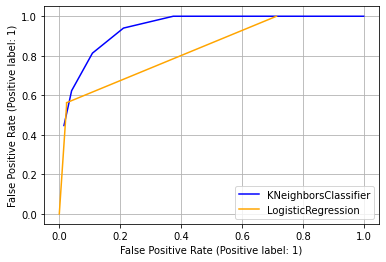

In [85]:
plt.plot(kfpr, ktpr, color='blue')
plt.plot(lfpr, ltpr, color='orange')

plt.xlabel("False Positive Rate (Positive label: 1)")
plt.ylabel("False Positive Rate (Positive label: 1)")
plt.legend(['KNeighborsClassifier', 'LogisticRegression'], loc=4)
plt.grid()
plt.show()
